In [58]:
import pandas as pd
import numpy as np

In [4]:
merged_df = pd.read_pickle('/data/epyc/users/kyboone/ztf_boyajian/merged_dippers.pkl')

In [10]:
[c for c in list(merged_df.columns) if "fit" in c]

['fit_r_skew_r',
 'fit_r_tophat_r',
 'fit_g_skew_g',
 'fit_g_tophat_g',
 'fit_i_skew_i',
 'fit_i_tophat_i']

In [14]:
fit_r = merged_df['fit_r_skew_r']
fit = fit_r[1]


Row(info=Row(message='OK', good=True, runtime=0.272244930267334), popt=[-442.1985778808594, 58662.2890625, 3.654378652572632, 0.9783753156661987, 19.28917121887207], pcov=[[998514.75, -2.9003381729125977, -478.0765380859375, -63.89607238769531, -0.5255358815193176], [-2.9003381729125977, 0.00010413729614811018, 0.0031246375292539597, 0.0002805611293297261, -1.3099631360091735e-05], [-478.0765380859375, 0.0031246375292539597, 2.6604723930358887, 0.5075775980949402, -0.002825414529070258], [-63.89607238769531, 0.0002805611293297261, 0.5075775980949402, 0.13221988081932068, -0.0017485682619735599], [-0.5255358815193176, -1.3099631360091735e-05, -0.002825414529070258, -0.0017485682619735599, 0.00022233929485082626]], p0=[0.0, 58670.484375, 32.60546875, 5.416621685028076, 19.333049774169922])

In [15]:
import models
import fit_utils

In [40]:
merged_df['fit_r_skew_r'][0]['pcov'][0][0]

float

In [48]:
import math
any([math.inf in _row for _row in merged_df['fit_r_skew_r'][0]['pcov']])

True

In [76]:
def make_mask(row):
    import math
    if type(row) is float:
        return False
    pcov = row['pcov']
    return not any([math.inf in _row for _row in pcov])

mask = merged_df['fit_r_skew_r'].apply(make_mask)

In [62]:
math.nan

nan

In [71]:
merged_df['fit_r_skew_r'][merged_df['fit_r_skew_r'].apply(lambda row : type(row) == float)][16]

nan

In [84]:
[c for c in list(merged_df.columns) if "window" in c]

['window_r_skew_r',
 'dip_window_r_skew_r',
 'around_dip_window_r_skew_r',
 'window_r_tophat_r',
 'dip_window_r_tophat_r',
 'around_dip_window_r_tophat_r',
 'window_g_skew_g',
 'dip_window_g_skew_g',
 'around_dip_window_g_skew_g',
 'window_g_tophat_g',
 'dip_window_g_tophat_g',
 'around_dip_window_g_tophat_g',
 'window_i_skew_i',
 'dip_window_i_skew_i',
 'around_dip_window_i_skew_i',
 'window_i_tophat_i',
 'dip_window_i_tophat_i',
 'around_dip_window_i_tophat_i']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

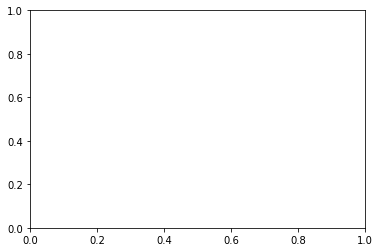

In [82]:
i = 6
band = 'r'
X = merged_df[f'window_{band}_skew_{band}'][mask]
Y = merged_df[f'mag_{band}_skew_{band}'][mask]
Yerr = merged_df[f'magerr_{band}_skew_{band}'][mask]
fit = merged_df[f'fit_{band}_skew_{band}'][mask]

fit_utils.plot_fit_result(
    X.iloc[i], Y.iloc[i], Yerr.iloc[i], fit.iloc[i], 
    models.skew_normal, with_p0=True
)

0        [58289.296701411105, 58505.56163191111, 58289....
1        [58694.26563661111, 58694.266076411106, 58694....
2        [58668.269270811106, 58668.26972221111, 58217....
3        [58640.27548611111, 58338.19006941111, 58643.2...
4        [58665.30383101111, 58691.25481481111, 58665.3...
                               ...                        
63244    [58369.42821761111, 58776.43243051111, 58776.4...
63245    [58323.490983811105, 58369.42771991111, 58329....
63246    [58806.553796311106, 58199.25431711111, 58199....
63247    [58776.229583311106, 58319.45636571111, 58776....
63248    [58276.48097221111, 58441.29837961111, 58441.3...
Name: mjd_r_skew_r, Length: 63249, dtype: object